# Probability, Random Variables, & Probability Density

- Probability theory is a mathematical framework for quantifying our uncertainty about the world. It allows us (and our software) to reason effectively in situations where being certain is impossible
- Random Variable is a variable which can take random values within the sample space
    - Example of Smaple Space - Flipping a coint, the sample space can be expressed as — {H, T} where H stands for a Head, and T stands for a Tail.
- A probability distribution is a way (mathmatical function) to determine what is the chance that a random variable takes a certain value in the sample space

# TensorFlow Probability

TensorFlow Probability is a library for probabilistic reasoning and statistical analysis in TensorFlow.

The TensorFlow team built TFP for data scientists, statisticians, and ML researchers and practitioners who want to encode domain knowledge to understand data and make predictions. TFP is a Python library built on TensorFlow that makes it easy to combine probabilistic models and deep learning on modern hardware. TFP allows you to:

- Explore your data interactively
- Evaluate different models rapidly
- Leverage modern, vectorized hardware accelerators automatically
- Launch easily and with confidence. TFP is professionally built and tested, Google-Cloud ready, and supported by a vibrant open source community.

TFP should be used if:
- You want to build a generative model of data, reasoning about its hidden processes.
- You need to quantify the uncertainty in your predictions, as opposed to predicting a single value.
- Your training set has a large number of features relative to the number of data points.
- Your data is structured — for example, with groups, space, graphs, or language semantics — and you’d like to capture this structure with prior information.

# Components (https://www.tensorflow.org/probability/overview)

### Layer0 - TensorFlow
- Numerical operations—in particular, the LinearOperator class—enables matrix-free implementations that can exploit a particular structure (diagonal, low-rank, etc.) for efficient computation. It is built and maintained by the TensorFlow Probability team and is part of tf.linalg in core TensorFlow.
### Layer1 - Statistical Building Blocks
- Distributions (tfp.distributions, tf.distributions): A large collection of probability distributions and related statistics with batch and broadcasting semantics.
- Bijectors (tfp.bijectors): Reversible and composable transformations of random variables. Bijectors provide a rich class of transformed distributions, from classical examples like the log-normal distribution to sophisticated deep learning models such as masked autoregressive flows.
### Layer2 - Layer 2: Model Building
- Edward2 (tfp.edward2): A probabilistic programming language for specifying flexible probabilistic models as programs.
- Probabilistic layers (tfp.layers): Neural network layers with uncertainty over the functions they represent, extending TensorFlow layers.
- Trainable distributions (tfp.trainable_distributions): Probability distributions parameterized by a single tensor, making it easy to build neural nets that output probability distributions.
### Layer3 - Probabilistic Inference
- Markov chain Monte Carlo (tfp.mcmc): Algorithms for approximating integrals via sampling. Includes Hamiltonian Monte Carlo, random-walk Metropolis-Hastings, and the ability to build custom transition kernels.
- Variational Inference (tfp.vi): Algorithms for approximating integrals through optimization.
- Optimizers (tfp.optimizer): Stochastic optimization methods, extending TensorFlow Optimizers. Includes Stochastic Gradient Langevin Dynamics.
- Monte Carlo (tfp.monte_carlo): Tools for computing Monte Carlo expectations.

In [1]:
import collections
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

try:
    tf.compat.v1.enable_eager_execution()
except ValueError:
    pass

import matplotlib.pyplot as plt


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
def print_subclasses_from_module(module, base_class, maxwidth=80):
    import functools, inspect, sys
    subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
    def red(acc, x):
        if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
            acc.append(x)
        else:
            acc[-1] += ", " + x
        return acc
    print('\n'.join(functools.reduce(red, subclasses, [])))

In [3]:
print_subclasses_from_module(tfp.distributions, tfp.distributions.Distribution)

Autoregressive, BatchReshape, Bernoulli, Beta, Binomial, Categorical, Cauchy
Chi, Chi2, Chi2WithAbsDf, ConditionalDistribution
ConditionalTransformedDistribution, Deterministic, Dirichlet
DirichletMultinomial, Distribution, ExpRelaxedOneHotCategorical, Exponential
Gamma, GammaGamma, GaussianProcess, GaussianProcessRegressionModel, Geometric
Gumbel, HalfCauchy, HalfNormal, HiddenMarkovModel, Horseshoe, Independent
InverseGamma, InverseGammaWithSoftplusConcentrationRate, InverseGaussian
Kumaraswamy, LKJ, Laplace, LinearGaussianStateSpaceModel, LogNormal, Logistic
Mixture, MixtureSameFamily, Multinomial, MultivariateNormalDiag
MultivariateNormalDiagPlusLowRank, MultivariateNormalDiagWithSoftplusScale
MultivariateNormalFullCovariance, MultivariateNormalLinearOperator
MultivariateNormalTriL, MultivariateStudentTLinearOperator, NegativeBinomial
Normal, OneHotCategorical, Pareto, Poisson, PoissonLogNormalQuadratureCompound
QuantizedDistribution, RelaxedBernoulli, RelaxedOneHotCategorical, Sin

In [4]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal/' batch_shape=() event_shape=() dtype=float32>

In [5]:
n.sample()

<tf.Tensor: id=22, shape=(), dtype=float32, numpy=-2.4924138>

In [6]:
samples = n.sample(1000)
samples.shape

TensorShape([Dimension(1000)])

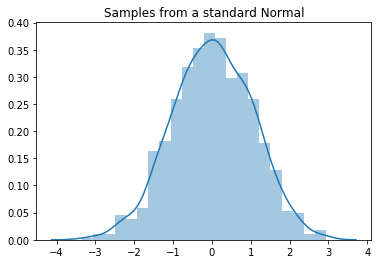

In [7]:
import seaborn as sns
sns.distplot(samples)
plt.title("Samples from a standard Normal")
plt.show()

In [8]:
# Compute the log_prob of a point in the event space of `normal`
n.log_prob(0.)

<tf.Tensor: id=59, shape=(), dtype=float32, numpy=-0.9189385>

In [9]:
# Compute the log_prob of a few points
n.log_prob([-1., 0., 1.])

<tf.Tensor: id=70, shape=(3,), dtype=float32, numpy=array([-1.4189385, -0.9189385, -1.4189385], dtype=float32)>

# More sample prob available here: 
https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/A_Tour_of_TensorFlow_Probability.ipynb

# Simple Linear Regression Example

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets
 
datasets = pd.read_csv('Salary_Data.csv')

X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set result ￼

Y_Pred = regressor.predict(X_Test)

In [11]:
Y_Pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [12]:
negloglik = lambda y, p_y: -p_y.log_prob(y)

In [13]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

# Build model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
#We make it explicit that we’re modeling the labels using a normal distribution with a scale of 1 
    #centered on location (mean) that’s dependent on the inputs - This is a special instance of tfd.Distribution
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)), 
])

# Do inference.
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=negloglik)
model.fit(X_Train, Y_Train, epochs=500, verbose=None)

# Make predictions.
X_Test = X_Test.astype('float32')
yhat = model(X_Test)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
print(len(list(yhat)))
print(len(X_Test))

10
10


In [15]:
mean = yhat.mean()
mean

<tf.Tensor: id=3578, shape=(10, 1), dtype=float32, numpy=
array([[0.5303119 ],
       [0.7081696 ],
       [0.5828607 ],
       [0.5788185 ],
       [0.69200075],
       [0.6758318 ],
       [0.6940218 ],
       [0.58083963],
       [0.6071141 ],
       [0.65966296]], dtype=float32)>

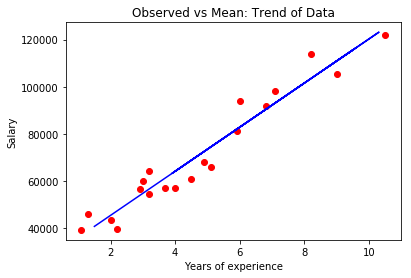

In [16]:
# Visualising the trend of the data

plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Test, regressor.predict(X_Test), color = 'blue')
plt.title('Observed vs Mean: Trend of Data')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

# Another Example
A fair dice is rolled if the result is an odd number then a fair coin is tossed 3 times. Otherwise, if the result is even number then a fair coin will be tossed 2 times. In both cases, # of heads is counted. What’s the variance of # heads obtained?
(https://towardsdatascience.com/a-tell-of-tensorflow-probability-a2bf5a364391)

# EagerTensor

TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later. This makes it easy to get started with TensorFlow and debug models, and it reduces boilerplate as well.

In [18]:
#import important libs
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

# Set the mode to eager execution
tf.enable_eager_execution()

# We have a fair die, so the probability of each side is equally likely
probs = [1/6.] * 6
probs

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [19]:
# This is where we are going to store the final result of each experiment
var_arr = []

In [20]:
# We do the same experiment 100 times
for k in range(0, 100):
    # Each time we throw our fair die 1000 times and record how many times each side is shown
    dices = tfp.distributions.Multinomial(total_count=1000, probs=probs)
    n = dices.sample()
    # Then convert the tf.tensor to a numpy array
    l = n.numpy()
    L = []
    # For each side of the die
    for i, nums in enumerate(l):
        # For how many times that side has turned up
        for _ in range(int(nums)):
            # if it is an odd number fase of the die (1, 3, 5) then toss the fair coin 3 times else 2 times
            mul_by = 3 if (i + 1) % 2 != 0 else 2
            # It is a fair coin thus each side is equally probable
            tosses = tfp.distributions.Bernoulli(probs=0.5)
            coin_flip_data = tosses.sample(mul_by)
            l2 = coin_flip_data.numpy()
            # How many times head turned up (assuming HEAD = 1)
            num_heads = np.sum(l2)
            L += [num_heads]
    # Calculate the variance and store it
    var_arr.append(np.var(L))

Instructions for updating:
Use tf.random.categorical instead.


In [21]:
np.mean(var_arr)

0.6878604000000001

the mean of the Global Variance list is 0.6879; We have verified the mathematical prediction using robust modeling and experiment

# References: 
    https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/
    https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/A_Tour_of_TensorFlow_Probability.ipynb
    https://medium.com/tensorflow/an-introduction-to-probabilistic-programming-now-available-in-tensorflow-probability-6dcc003ca29e
    https://medium.com/tensorflow/introducing-tensorflow-probability-dca4c304e245